In [1]:
from fastai.vision import *

1) go -> 
    images.google.com\n
    
2) search for pictures

3) ctrl+shift+i
    paste ->
    
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl')); window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

4)    save as            file = 'urls_hare.csv'

5)   put the file to -> path = Path('data/rabbit-hare')

In [21]:
folder = 'hare'
file = 'urls_hare.csv'

In [22]:
path = Path('data/rabbit-hare')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [24]:
download_images(path/file, dest, max_pics=800)

In [18]:
folder = 'rabbit'
file = 'urls_rabbit.csv'

In [11]:
path = Path('data/rabbit-hare')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [ ]:
download_images(path/file, dest, max_pics=800)

In [25]:
path.ls()

[WindowsPath('data/rabbit-hare/hare'),
 WindowsPath('data/rabbit-hare/rabbit'),
 WindowsPath('data/rabbit-hare/urls_hare.csv'),
 WindowsPath('data/rabbit-hare/urls_rabbit.csv')]

In [26]:
classes = ['hare','rabbit']

In [28]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=2000)

hare


rabbit


In [29]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [30]:
data.classes

['hare', 'rabbit']

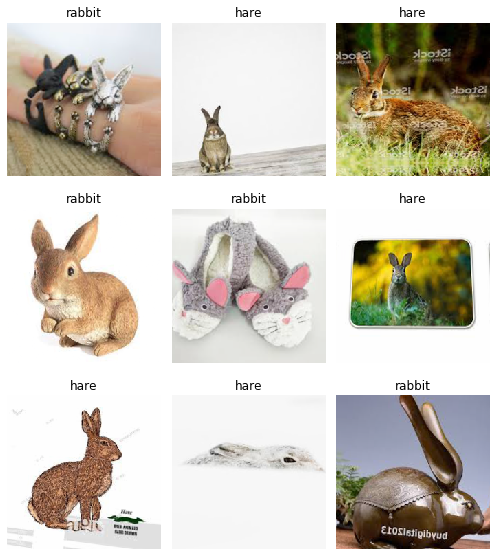

In [31]:
data.show_batch(rows=3, figsize=(7,8))

In [32]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['hare', 'rabbit'], 2, 728, 181)

### Train model

In [33]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [34]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.957817,0.786474,0.309392,00:19
1,0.851583,0.783495,0.320442,00:17
2,0.716636,0.721678,0.287293,00:17
3,0.634727,0.711618,0.276243,00:18


In [35]:
learn.save('stage-1')

In [36]:
learn.unfreeze()

In [41]:
learn.lr_find()
# learn.lr_find(start_lr=1e-6, end_lr=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


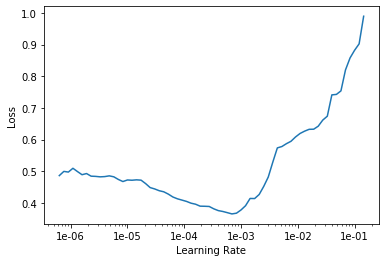

In [42]:
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


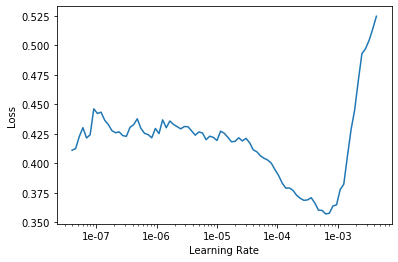

In [43]:
learn.lr_find(start_lr=1e-8, end_lr=1e-2)
learn.recorder.plot()

In [44]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.454689,0.734356,0.270718,00:19
1,0.406770,0.773640,0.254144,00:18


In [45]:
learn.save('stage-2')

### Interpretation

In [46]:
learn.load('stage-2');

In [47]:
interp = ClassificationInterpretation.from_learner(learn)

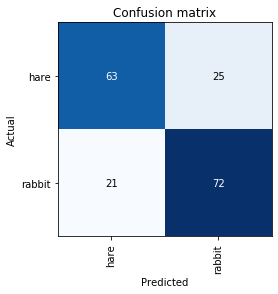

In [48]:
interp.plot_confusion_matrix()

### Cleaning up 

In [49]:
from fastai.widgets import *

In [50]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [51]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [52]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [53]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [54]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [55]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [57]:
data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [58]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [59]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.011263,0.817343,0.293413,00:18
1,0.882401,0.744638,0.281437,00:18
2,0.772081,0.710790,0.275449,00:18
3,0.675333,0.696777,0.287425,00:18


In [61]:
learn.unfreeze()

In [62]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


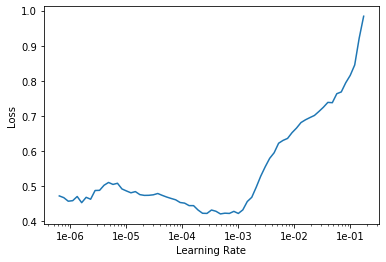

In [63]:
learn.recorder.plot()

In [64]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.497492,0.761909,0.299401,00:18
1,0.431864,0.788024,0.299401,00:18


In [65]:
learn.save('stage-3')

In [66]:
interp = ClassificationInterpretation.from_learner(learn)

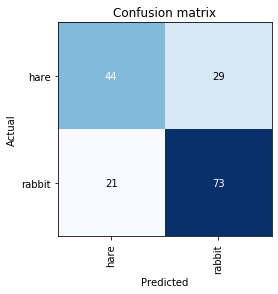

In [67]:
interp.plot_confusion_matrix()

### Putting your model in production

In [68]:
learn.export()

In [69]:
defaults.device = torch.device('cpu')

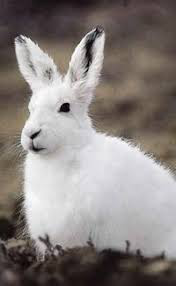

In [70]:
img = open_image(path/'hare'/'00000013.jpg')
img

In [71]:
learn = load_learner(path)

In [73]:
data.classes

['hare', 'rabbit']

In [78]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class
str(pred_class)

'rabbit'